In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

## Determine magnetic field as a function of current in coils

In [2]:
Currents = np.array([0, 0.49, 0.98, 1.5, 1.98, 2.48, 2.99, 3.61, 3.97, 4.48, 5.02, 5.49, 6.04, 6.44, 6.98, 7.46, 8.02]) #Amps
Fields = np.array([0.3, 149, 302.3, 470.4, 623.2, 789, 949.2, 1143.5, 
                   1245.8, 1408.2, 1571.5, 1679, 1802.8, 1879.4, 1963.5, 2028.2, 2096.2]) #Gauss

Above measurements were taken before the coil wires had time to warm. Suspect coils warmed due to current running for long periods of time during the measurement process of Zeeman splitting. 

In [3]:
#Hot data
Currents = np.array([0, 0.5, 1, 1.5, 1.99, 2.48, 2.95, 3.51, 4, 4.48, 5, 5.49, 5.98, 6.49, 7.01, 7.25]) #Amps
Fields = np.array([0.1, 192.4, 366.2, 555.2, 753.1, 937.5, 1130.6, 1331.7, 1502.5, 1686.3, 1857.3,
2006.5, 2149.1, 2262, 2359.1, 2399.2]) #Gauss

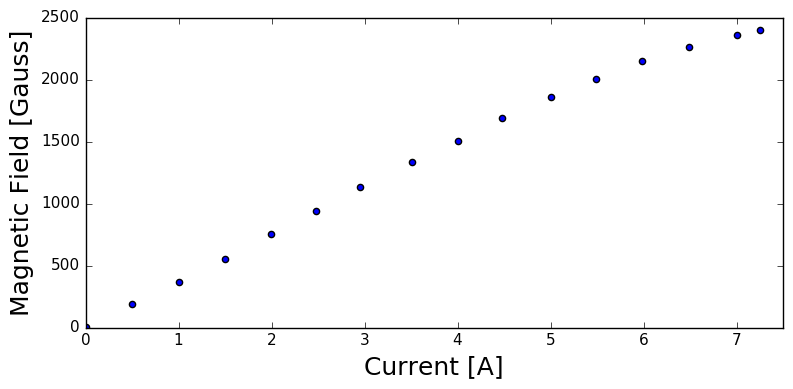

In [4]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields);
plt.xlim(0,7.5);
plt.ylim(0,2500)
plt.xlabel('Current [A]',size=18);
plt.ylabel('Magnetic Field [Gauss]',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);

In [5]:
def myfun(A,a,b,c,d):
    ans = a*A + b*A**2 + c*A**3 + d*A**4  # this is y, "the function to be fit"
    return ans

In [6]:
p0 = [1500/4,0,0,0]

In [7]:
xlots = np.linspace(0,7.5,500)  # need lots of data points for smooth curve
yfit = np.zeros((len(Currents),xlots.size))

plsq, pcov = curve_fit(myfun, Currents, Fields, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
b = plsq[1]
eb = np.sqrt(pcov[1,1])
c = plsq[2]
ec = np.sqrt(pcov[2,2])
d = plsq[3]
ed = np.sqrt(pcov[3,3])


yfit = myfun(xlots,plsq[0],plsq[1],c,d)  # use fit results for a, b, c
    
print('a = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.1f +/- %.1f' % (plsq[2], np.sqrt(pcov[2,2])))
print('d = %.1f +/- %.1f' % (plsq[3], np.sqrt(pcov[3,3])))

a = 363 +/- 7
b = 8.4 +/- 5.3
c = -0.4 +/- 1.2
d = -0.2 +/- 0.1


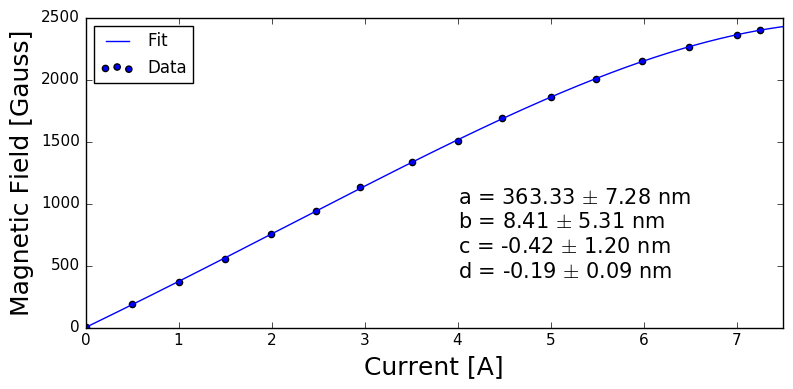

In [15]:
plt.figure(figsize=(9,4))
plt.scatter(Currents, Fields);
plt.xlim(0,7.5);
plt.ylim(0,2500);
plt.xlabel('Current [A]',size=18);
plt.ylabel('Magnetic Field [Gauss]',size=18);
plt.xticks(size = 11);
plt.yticks(size = 11);
plt.text(4, 1000, 'a = %.2f $\pm$ %.2f nm' %(a,ea), fontsize=15)
plt.text(4, 800, 'b = %.2f $\pm$ %.2f nm' %(b,eb), fontsize=15)
plt.text(4, 600, 'c = %.2f $\pm$ %.2f nm' %(c,ec), fontsize=15)
plt.text(4, 400, 'd = %.2f $\pm$ %.2f nm' %(d,ed), fontsize=15)
plt.plot(xlots,yfit);
plt.legend(['Fit','Data'],loc='best');
plt.savefig('FieldFit.png')

## Determine field on sample during splitting measurements

In [9]:
AppliedCurrents1 = np.array([3.39, 3.98, 4.41, 4.81, 5.29, 5.87, 6.35, 6.87]) #Amps.

In [10]:
AppliedFields1 = myfun(AppliedCurrents1,a,b,c,d) #Gauss fields during Zeeman splitting measurements
AppliedFields1

array([ 1287.18596104,  1505.68749629,  1658.80938095,  1794.94411507,
        1948.12964917,  2114.60223365,  2233.34119528,  2338.41449766])

In [11]:
AppliedCurrents2 = np.array([5.64, 6, 6.31, 6.64, 6.93, 7.26]) #Amps.

In [12]:
AppliedFields2 = myfun(AppliedCurrents2,a,b,c,d) #Gauss fields during Zeeman splitting measurements
AppliedFields2

array([ 2051.32560426,  2148.61893727,  2224.19251998,  2295.23183355,
        2348.76568045,  2398.4887764 ])